<a href="https://colab.research.google.com/github/Sudharani4/Customer-Conversion-Prediction/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading dataset to pandas Data Frame
df = pd.read_csv("data.csv")
type(df)

pandas.core.frame.DataFrame

In [ ]:
#number of rows & Columns in dataset
df.shape

(45211, 11)

# **Data Cleaning**

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
#printing first 5 rows of dataframe
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
# Statistical Measures
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


No outliers in the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


Checking missing values

In [ ]:
#Checking missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

No missing Values in the dataset

In [ ]:
#Checking for Duplicates

In [ ]:
df.duplicated().sum()

6

In [ ]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

In [ ]:
df.duplicated().sum()

0

#                                                       **  EDA**

In [ ]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

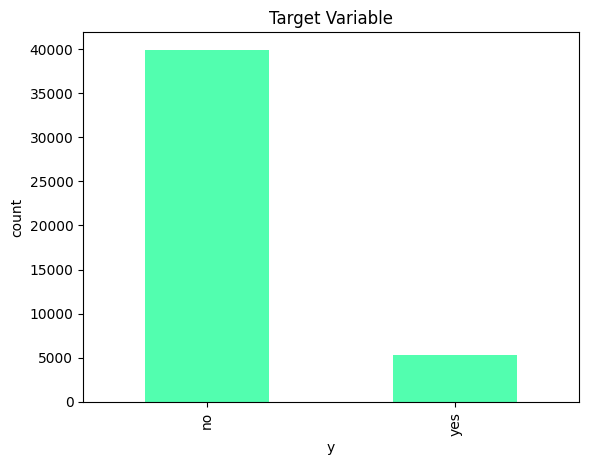

In [ ]:
df['y'].value_counts().plot.bar(color = np.random.rand(3,))

plt.title("Target Variable")
plt.xlabel('y')
plt.ylabel('count')
plt.show()

From the above,out of 39916 only 5289 users subscribed(very less percentage).
The class distribution in the target variable is ~89:11 indicating an imbalance dataset

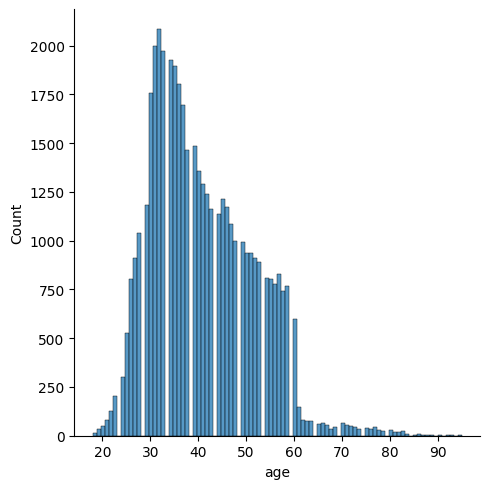

In [ ]:
sns.displot(df["age"])

<Axes: >

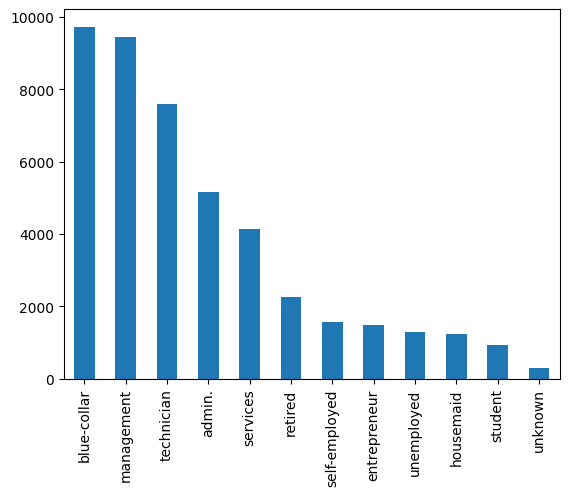

In [ ]:
df['job'].value_counts().plot.bar()

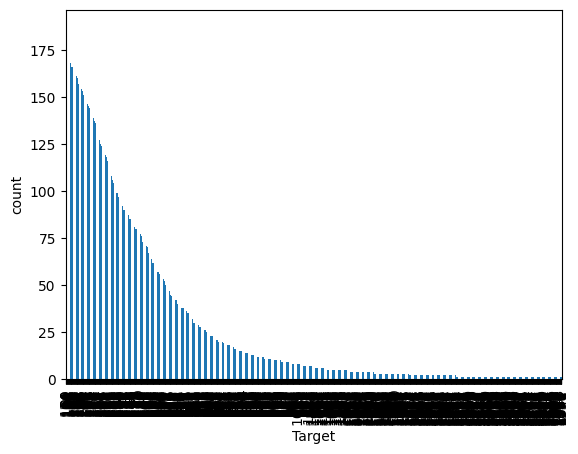

In [ ]:
df['dur'].value_counts().plot.bar()
plt.xlabel('Target')
plt.ylabel('count')
plt.show()

**Here Duration of the call is an important Feature.Higher the duration of call, high chances of taking insurance policy. 

<Axes: >

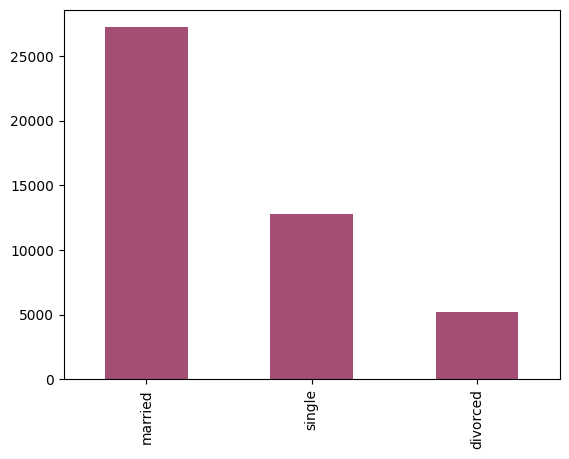

In [ ]:
df['marital'].value_counts().plot.bar(color = np.random.rand(3,))

In [ ]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<Axes: >

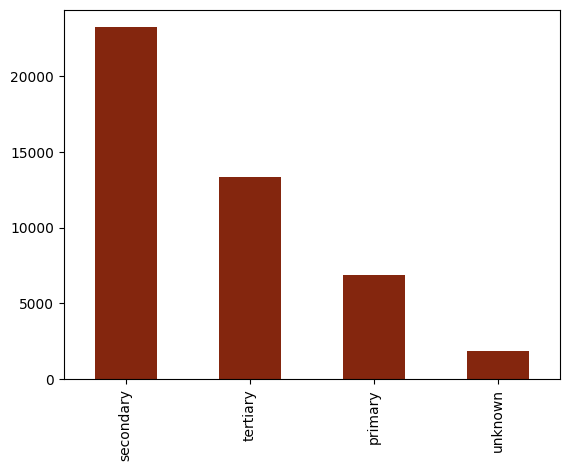

In [ ]:
df['education_qual'].value_counts().plot.bar(color = np.random.rand(3,))

Text(0, 0.5, 'Percentage')

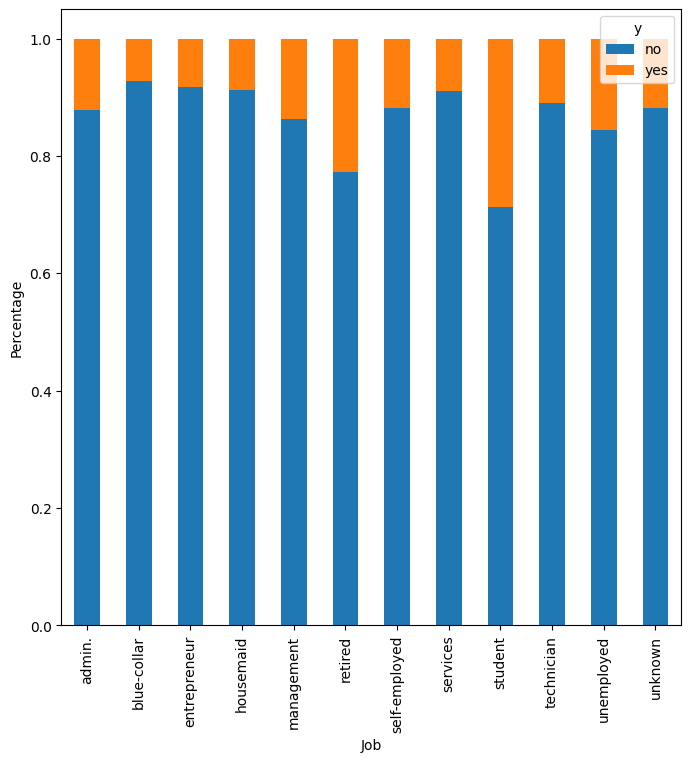

In [ ]:
job=pd.crosstab(df['job'],df['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

 From the above, Students are subcribed to insurance compared to others. The number of students in the dataset is less and comparatively to other job types, more students have subscribed

Text(0, 0.5, 'Percentage')

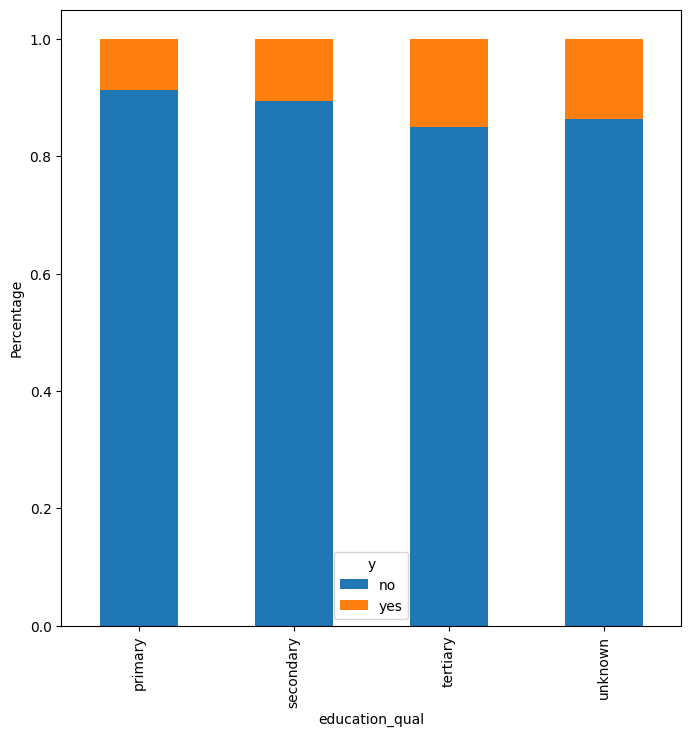

In [ ]:
education_qual=pd.crosstab(df['education_qual'],df['y'])
education_qual.div(education_qual.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('education_qual')
plt.ylabel('Percentage')

 The people Who is having Education_qual - Tertiary and unknown have slightly higher chances of subscribing to a insurance policy as compared to the other.

<ipython-input-27-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

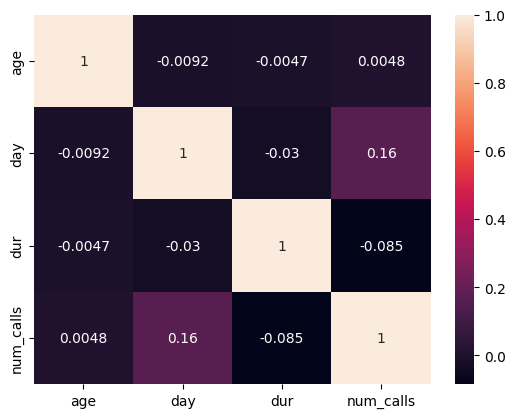

In [ ]:
sns.heatmap(df.corr(),annot=True)

We can infer that duration of the call is highly correlated with the target variable.If duration of the call is more, there are higher chances that the client is showing interest in the term deposit.





In [ ]:
num_col = df.select_dtypes(exclude="object").columns
cat_col = df.select_dtypes(include="object").columns

print(f'num_col:{num_col}')
print(f'cat_col:{cat_col}')

num_col:Index(['age', 'day', 'dur', 'num_calls'], dtype='object')
cat_col:Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


In [ ]:
#df[num_col]
#df[cat_col]

In [ ]:
## Seperating Independent and dependent features:
## iloc[rows,columns],loc data extractions purpose

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(X.head())

   age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome  
0          1      unknown  
1          1      unknown  
2          1      unknown  
3          1      unknown  
4          1      unknown  


In [ ]:
print(y.head())

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object


In [ ]:
X.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown
1,44,technician,single,secondary,unknown,5,may,151,1,unknown
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown


In [ ]:
pd.get_dummies(X).shape

(45205, 42)

In [ ]:
df[cat_col].head()

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,unknown,may,unknown,no
1,technician,single,secondary,unknown,may,unknown,no
2,entrepreneur,married,secondary,unknown,may,unknown,no
3,blue-collar,married,unknown,unknown,may,unknown,no
4,unknown,single,unknown,unknown,may,unknown,no


In [ ]:
df[cat_col].nunique()

job               12
marital            3
education_qual     4
call_type          3
mon               12
prev_outcome       4
y                  2
dtype: int64

In [ ]:
pd.get_dummies(X,drop_first='True').shape

(45205, 36)

In [ ]:
for i in cat_col:
    X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.shape

(45205, 36)

<Axes: >

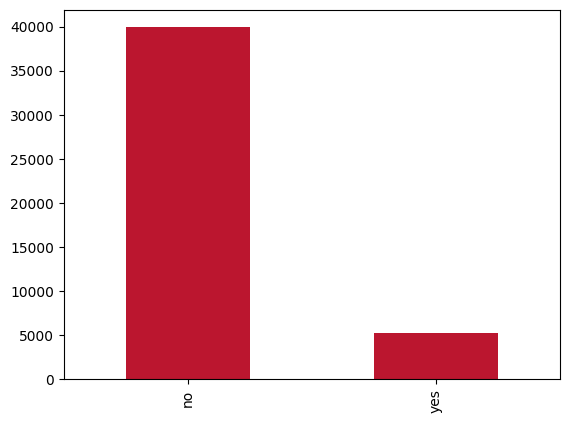

In [ ]:
df['y'].value_counts().plot.bar(color = np.random.rand(3,))

In [ ]:
y.value_counts(normalize=True)## Imbalancing problem

no     0.883
yes    0.117
Name: y, dtype: float64

In [ ]:
y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

One group is having more than 70%.Data imbalaning occurs

In [ ]:
label={
    'no':0,
    'yes':1
    }
label

{'no': 0, 'yes': 1}

In [ ]:
y = y.map(label)


We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 25% data as validation set and rest as the training set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
smk= SMOTETomek(random_state=42)
smk.fit(X_train,y_train)

SMOTETomek(random_state=42)

In [ ]:
X_train.shape,y_train.shape

((36164, 36), (36164,))

In [ ]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(36164, 36)
(9041, 36)
(36164,)
(9041,)


Data is balanced now

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

Data is ready. For classification problem i am going to use Logistic Regression Model.

# **Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
l_pred=lr_model.predict(X_test)
print(accuracy_score(l_pred,y_test))
print(roc_auc_score(l_pred,y_test))

0.8964716292445526
0.7696061179371212


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0, splitter='best')
dtc.fit(X_train, y_train)
D_pred = dtc.predict(X_test)
print(accuracy_score(D_pred,y_test))
print(roc_auc_score(D_pred,y_test))

0.8718062161265346
0.6961342546219659


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
K_pred = KNC.predict(X_test)
print(accuracy_score(K_pred,y_test))
print(roc_auc_score(K_pred,y_test))

0.8783320429156066
0.6933482212059224



**Here most important feature is duration**

Based on the results obtained from the evaluation of the three classification models (Logistic Regression, KNN, and Decision Tree Classifier) on the given historical data,Logistic Regression gives Accuracy Score of 89% and the highest AUROC score of 0.76. 